# PSF Generation Validation

This validation process involves the following:

- Determine a set of PSF configurations to test
- Create a PSF for each of those configurations using both Flowdec and PSFGenerator
- Store any more detailed visualizations/statistics in a separate notebook for each configuration
- Aggregate top-line statistics like SSIM and PSNR to visualize across all configurations

In [46]:
import papermill as pm
import os
import os.path as osp
import pandas as pd
from flowdec import psf as fd_psf
nb_dir = 'results'

In [47]:
# Show default arguments and use these to derive test cases
fd_psf.GibsonLanni().get_arg_parser().print_help()

usage: ipykernel_launcher.py [-h] [--size-x SIZE_X] [--size-y SIZE_Y]
                             [--size-z SIZE_Z] [--na NA]
                             [--wavelength WAVELENGTH] [--m M] [--ns NS]
                             [--ng0 NG0] [--ng NG] [--ni0 NI0] [--ni NI]
                             [--ti0 TI0] [--tg0 TG0] [--tg TG]
                             [--res-lateral RES_LATERAL]
                             [--res-axial RES_AXIAL] [--pz PZ]
                             [--num-basis NUM_BASIS]
                             [--num-samples NUM_SAMPLES]
                             [--oversampling OVERSAMPLING]
                             [--min-wavelength MIN_WAVELENGTH]

optional arguments:
  -h, --help            show this help message and exit

Dimensions:
  --size-x SIZE_X       Number of pixels in result (x dimension) (default:
                        256)
  --size-y SIZE_Y       Number of pixels in result (y dimension) (default:
                        256)
  --size-z SIZ

In [3]:
# Build test case argument sets

args = [
    {
        'name': 'particle-pos-p1um',
        # "num_samples" is increased here from default of 1000
        # because approximations are significantly further off otherwise
        'args': {'psf_args': '{"pz": 1.0, "num_samples": 2000}'}   
    }, {
        'name': 'particle-pos-n1um',
        'args': {'psf_args': '{"pz": -1.0, "num_samples": 2000}'}   
    }, {
        'name': 'red-light',
        'args': {'psf_args': '{"pz": 0.0, "wavelength": 0.7}'}   
    }, {
        'name': 'blue-light',
        # "min_wavelength" is lowered here from default of .436 microns
        # because approximations are significantly further off otherwise
        'args': {'psf_args': '{"pz": 0.0, "wavelength": 0.45, "min_wavelength": 0.35}'}   
    }, {
        'name': 'green-light',
        'args': {'psf_args': '{"pz": 0.0, "wavelength": 0.55, "min_wavelength": 0.35}'}   
    }, {
        'name': 'low-zres',
        'args': {'psf_args': '{"pz": 0.0, "res_axial": 1.5, "num_samples": 2000}'}   
    }, {
        'name': 'hi-zres',
        'args': {'psf_args': '{"pz": 0.0, "res_axial": 0.1}'}   
    }, {
        'name': 'large-xy',
        'args': {'psf_args': '{"pz": 0.0, "size_x": 512, "size_y": 400, "size_z": 16}'}   
    }, {
        'name': 'large-z',
        'args': {'psf_args': '{"pz": 0.0, "size_x": 32, "size_y": 64, "size_z": 128}'}   
    },
]

In [4]:
# Run a comparison process for each configuration defined above
os.makedirs(nb_dir, exist_ok=True)
for arg in args:
    print('Executing comparisons for configuration "{}"'.format(arg['name']))
    nb_template = 'template.ipynb'
    out_path = osp.join(nb_dir, arg['name'] + '.ipynb')
    pm.execute_notebook(nb_template, out_path, parameters=arg['args'])

Executing comparisons for configuration "particle-pos-p1um"


Input Notebook:  template.ipynb
Output Notebook: results/particle-pos-p1um.ipynb
100%|██████████| 27/27 [00:40<00:00,  1.49s/it]


Executing comparisons for configuration "particle-pos-n1um"


Input Notebook:  template.ipynb
Output Notebook: results/particle-pos-n1um.ipynb
100%|██████████| 27/27 [00:39<00:00,  1.47s/it]


Executing comparisons for configuration "red-light"


Input Notebook:  template.ipynb
Output Notebook: results/red-light.ipynb
100%|██████████| 27/27 [00:34<00:00,  1.28s/it]


Executing comparisons for configuration "blue-light"


Input Notebook:  template.ipynb
Output Notebook: results/blue-light.ipynb
100%|██████████| 27/27 [00:42<00:00,  1.56s/it]


Executing comparisons for configuration "green-light"


Input Notebook:  template.ipynb
Output Notebook: results/green-light.ipynb
100%|██████████| 27/27 [00:38<00:00,  1.44s/it]


Executing comparisons for configuration "low-zres"


Input Notebook:  template.ipynb
Output Notebook: results/low-zres.ipynb
100%|██████████| 27/27 [01:32<00:00,  3.42s/it]


Executing comparisons for configuration "hi-zres"


Input Notebook:  template.ipynb
Output Notebook: results/hi-zres.ipynb
100%|██████████| 27/27 [00:31<00:00,  1.17s/it]


Executing comparisons for configuration "large-xy"


Input Notebook:  template.ipynb
Output Notebook: results/large-xy.ipynb
100%|██████████| 27/27 [00:15<00:00,  1.73it/s]


Executing comparisons for configuration "large-z"


Input Notebook:  template.ipynb
Output Notebook: results/large-z.ipynb
100%|██████████| 27/27 [00:11<00:00,  2.45it/s]


In [5]:
# Aggregate results across all configurations
df = pm.read_notebooks(nb_dir).dataframe
df['key'] = df['key'].apply(lambda v: v.replace('.ipynb', ''))
df.head()

,name,value,type,filename,key
0,psf_args,"{""pz"": 0.0, ""wavelength"": 0.45, ""min_wavelengt...",parameter,blue-light.ipynb,blue-light
1,df_log,"{'Diff': {'25%': -0.0016736984252929688, '50%'...",record,blue-light.ipynb,blue-light
2,df_original,"{'Diff': {'25%': -7.486232789233327e-08, '50%'...",record,blue-light.ipynb,blue-light
3,measures,"{'psnr_log': 40.984099215285056, 'psnr_origina...",record,blue-light.ipynb,blue-light
4,psf_args,"{""pz"": 0.0, ""wavelength"": 0.55, ""min_wavelengt...",parameter,green-light.ipynb,green-light


In [6]:
def extract_series(df, prop):
    df = df[df['name'] == prop].set_index('key')
    return pd.concat([pd.Series(r['value']).rename('value').to_frame().assign(key=k) for k, r in df.iterrows()])
df_meas = extract_series(df, 'measures')
df_meas.head()

,value,key
psnr_log,40.984099,blue-light
psnr_original,116.153428,blue-light
ssim_log,0.998636,blue-light
ssim_original,1.000000,blue-light
psnr_log,66.781530,green-light


## Scores

This table shows SSIM and PSNR scores (between Flowdec and PSFGenerator) on the original PSF image scale as well as a logarithmic scale:

**SSIM**

In [28]:
pd.concat([
    df_meas.loc['ssim_log'].set_index('key')['value'].rename('ssim_log_scale'),
    df_meas.loc['ssim_original'].set_index('key')['value'].rename('ssim_original_scale')
], axis=1)

,ssim_log_scale,ssim_original_scale
key,,
blue-light,0.998636,1.0
green-light,0.999990,1.0
hi-zres,1.000000,1.0
large-xy,1.000000,1.0
large-z,1.000000,1.0
low-zres,0.999932,1.0
particle-pos-n1um,0.999886,1.0
particle-pos-p1um,0.999886,1.0
red-light,1.000000,1.0


**PSNR**

In [45]:
pd.concat([
    df_meas.loc['psnr_log'].set_index('key')['value'].rename('psnr_log_scale'),
    df_meas.loc['psnr_original'].set_index('key')['value'].rename('psnr_original_scale')
], axis=1)

,psnr_log_scale,psnr_original_scale
key,,
blue-light,40.984099,116.153428
green-light,66.781530,128.495587
hi-zres,159.330339,200.770418
large-xy,144.351244,205.861848
large-z,83.021613,137.138291
low-zres,65.626906,113.602541
particle-pos-n1um,44.805171,121.536585
particle-pos-p1um,44.805171,121.536585
red-light,108.406498,161.949216


## Maximum Differences

This section shows the maximum difference for any single voxel value between Flowdec and PSFGenerator PSFs versus the range of the original PSF images:

In [29]:
def extract_df(df, prop):
    df = df[df['name'] == prop].set_index('key')
    return pd.concat([pd.DataFrame(r['value']).assign(key=k) for k, r in df.iterrows()])

df_stat = extract_df(df, 'df_original')

In [39]:
df_extrema = pd.concat([
    df_stat.loc['max'].set_index('key')['Diff'].rename('max_diff'),
    df_stat.loc['min'].set_index('key')['Diff'].rename('min_diff'),
    df_stat.loc['max'].set_index('key')['Flowdec'].rename('Fowdec PSF Max Value'),
    df_stat.loc['min'].set_index('key')['Flowdec'].rename('flowdec PSF Min Value'),
    df_stat.loc['max'].set_index('key')['PSFGenerator'].rename('PSFGenerator PSF Max Value'),
    df_stat.loc['min'].set_index('key')['PSFGenerator'].rename('PSFGenerator PSF Max Value'),
], axis=1)
df_extrema['Absolute Max Difference'] = df_extrema[['min_diff', 'max_diff']].abs().max(axis=1)
df_extrema = df_extrema.drop(['min_diff', 'max_diff'], axis=1)
df_extrema

,Fowdec PSF Max Value,flowdec PSF Min Value,PSFGenerator PSF Max Value,PSFGenerator PSF Max Value,Absolute Max Difference
key,,,,,
blue-light,1.0,9.857429e-10,1.0,9.857429e-10,4.638507e-05
green-light,1.0,6.726014e-10,1.0,6.726014e-10,2.790959e-05
hi-zres,1.0,3.078059e-10,1.0,3.078059e-10,2.980232e-08
large-xy,1.0,1.237140e-10,1.0,1.237140e-10,1.490116e-08
large-z,1.0,1.484220e-06,1.0,1.484220e-06,1.096936e-05
low-zres,1.0,4.496030e-08,1.0,4.496030e-08,1.301039e-04
particle-pos-n1um,1.0,7.155783e-10,1.0,7.155783e-10,1.077533e-03
particle-pos-p1um,1.0,7.155785e-10,1.0,7.155785e-10,1.077533e-03
red-light,1.0,2.110213e-09,1.0,2.110213e-09,1.150649e-06


Text(0.5,1,'Dynamic Range of PSFs vs Largest Difference by Test Case')

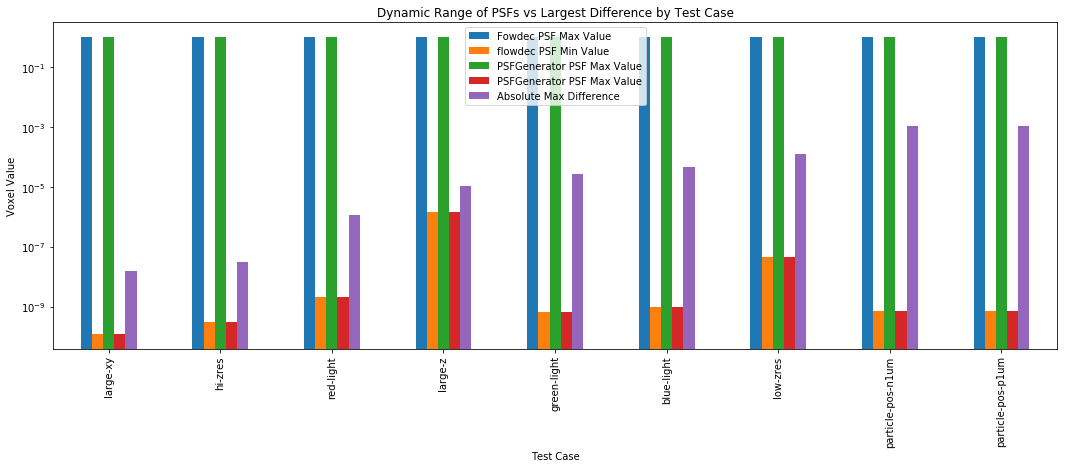

In [44]:
ax = df_extrema.sort_values('Absolute Max Difference').plot(figsize=(18, 6), kind='bar', legend='side')
ax.set_yscale('log')
ax.set_xlabel('Test Case')
ax.set_ylabel('Voxel Value')
ax.set_title('Dynamic Range of PSFs vs Largest Difference by Test Case')